# Telecom Churn Prediction - Week 6

## EDA, Data Visualization, Feature Scaling and Data Transformation

The telecom industry faces a significant challenge in retaining customers, as increasing competition and evolving customer preferences contribute to a higher churn rate. **Churn** is defined as the percentage of subscribers who discontinue services within a given time period, poses a substantial threat to the revenue and sustainability of telecom service providers. To address this issue, there is a critical need for the development and implementation of an accurate and efficient churn prediction model.

The main aim of this project is to build Ensemble Machine learning Algorithms to predict the customer Churn.

## Understanding the dataset 

There are 7043 rows and 21 Features (Target Variable - Churn)

    1. customerID 

    2. gender - Whether the customer is a male or a female

    3. SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

    4. Partner - Whether the customer has a partner or not (Yes, No)

    5. Dependents - Whether the customer has dependents or not (Yes, No)

    6. tenure -Number of months the customer has stayed with the company

    7. PhoneService - Whether the customer has a phone service or not (Yes, No)

    8. MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

    9. InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

    10. OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

    11. OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

    12. DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

    13. TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

    14. StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

    15. StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

    16. Contract - The contract term of the customer (Month-to-month, One year, Two year)

    17. PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

    18. PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

    19. MonthlyCharges - The amount charged to the customer monthly

    20. TotalCharges - The total amount charged to the customer

    21. Churn - Whether the customer churned or not (Yes or No)

### Importing necessary libraries

In [1]:
## supressing warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### importing the dataset

In [3]:
df = pd.read_csv('telecom.csv')

In [4]:
# To display maximum rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# To display top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# To display bottom 5 rows 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# To check the dimension of the dataframe
df.shape

(7043, 21)

In [8]:
# statistical info of the dataset 

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# lets check the datatype of each column 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# To check the duplicates in the data set

df.duplicated().sum()

0

In [11]:
# To check the null values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Churn - Target Variable

In [12]:
# Count of Churn - Yes & No

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

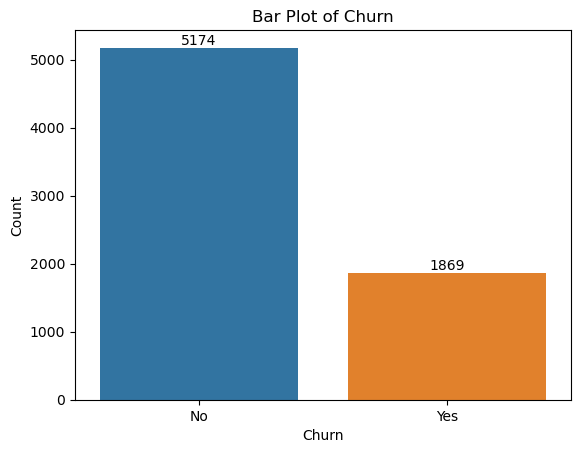

In [13]:
a = sns.countplot(df['Churn'])
a.bar_label(a.containers[0])
plt.title("Bar Plot of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.savefig("Churn.png")
plt.show()

### From the above bar plot, it is clear that the target variable is imbalance

### To assess the precision of the model, initially, we will construct machine learning algorithms using an imbalanced dataset and evaluate their accuracies. Subsequently, we will develop ML models with a balanced dataset for comparison 

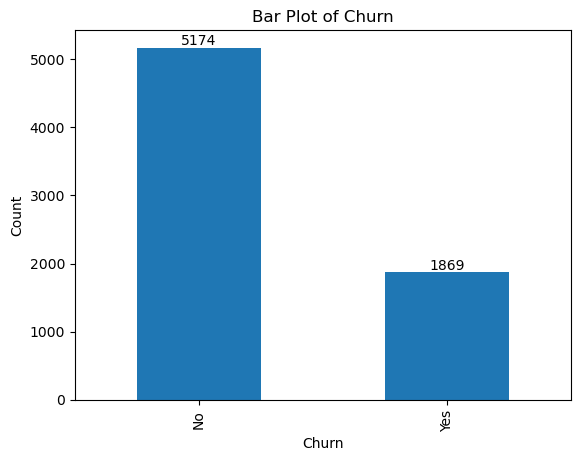

In [14]:
# plot of Churn

a = df['Churn'].value_counts().plot(kind = 'bar')
a.bar_label(a.containers[0])
plt.title("Bar Plot of Churn")
plt.ylabel("Count")
plt.xlabel("Churn")
plt.show()

##### The datatype of TotalCharges is object, we shall convert this into int

In [15]:
#The varaible was imported as a string we need to convert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [16]:
# The total charges are convereted into float
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [17]:
## Drop customerID 

df = df.drop(columns='customerID')

In [18]:
df_categorical = df.select_dtypes(include='object')
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [19]:
df_continuous = df.select_dtypes(include='number')
df_continuous.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


#### from the data, SeniorCitizen has values 1 or 0

In [20]:
## 'SeniorCitizen' feature has values 1 or 0
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

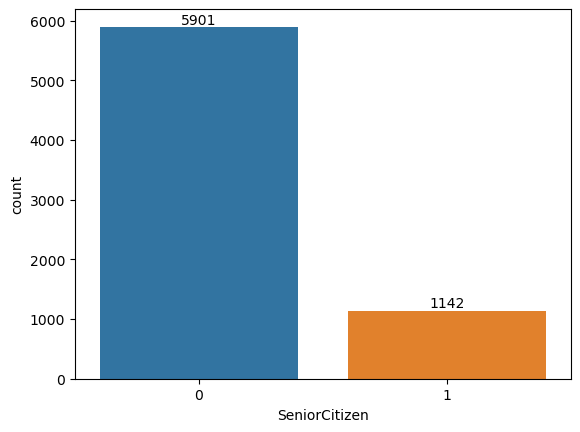

In [21]:
x = sns.countplot(df['SeniorCitizen'])
x.bar_label(x.containers[0])
plt.show()

In [22]:
df_continuous = df_continuous.drop(columns='SeniorCitizen')
df_continuous

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


### Categorical Data

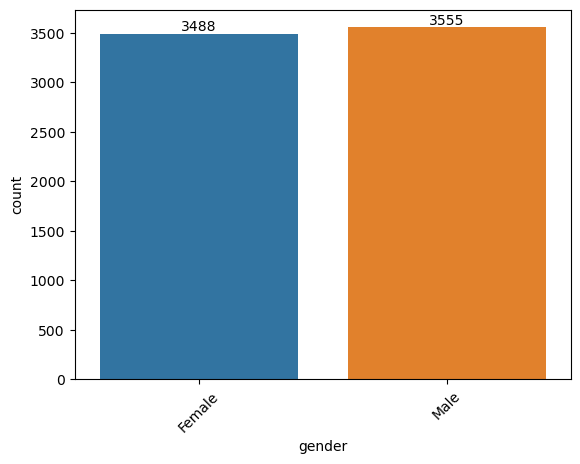

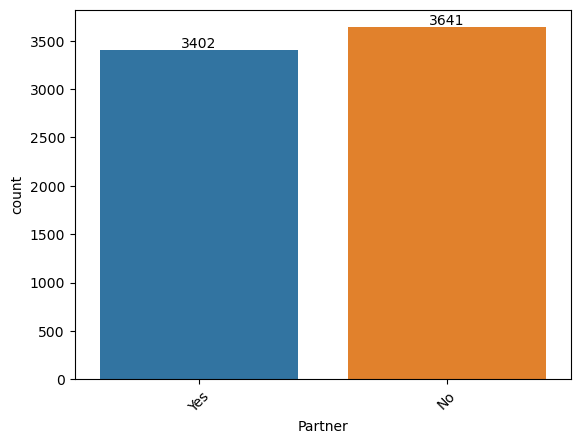

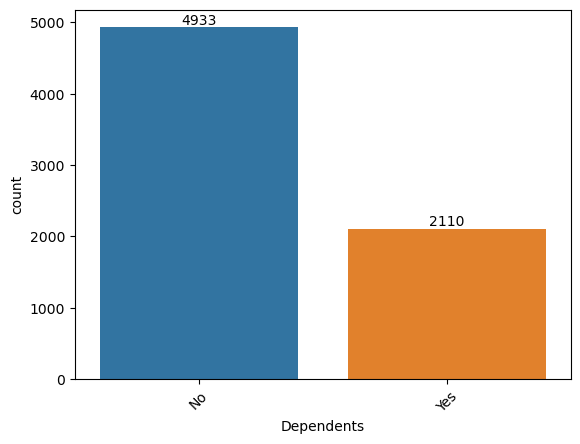

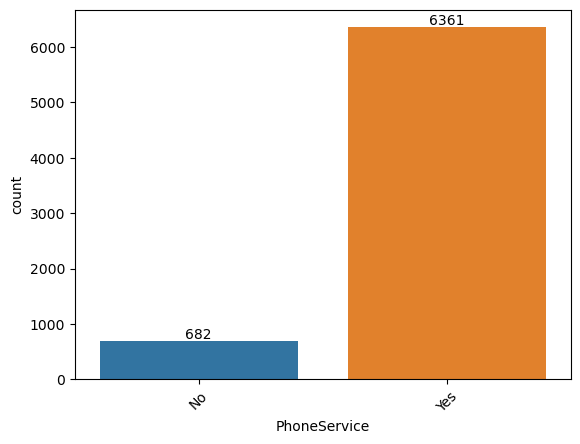

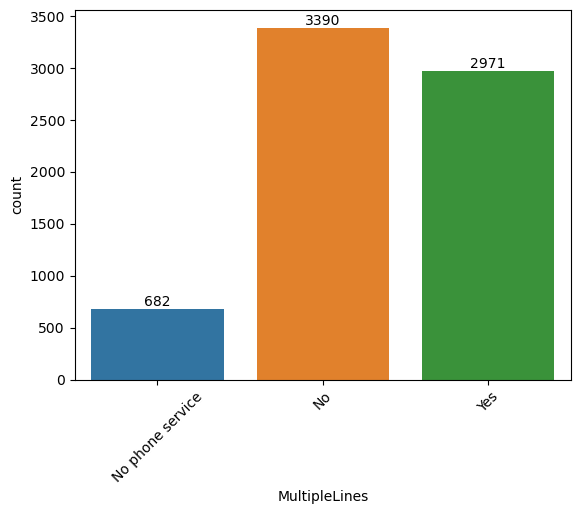

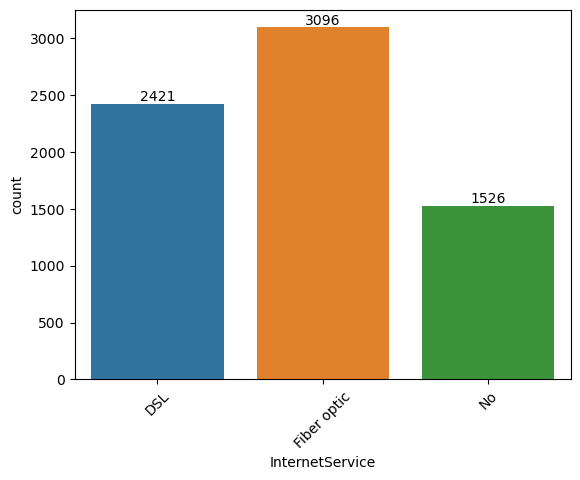

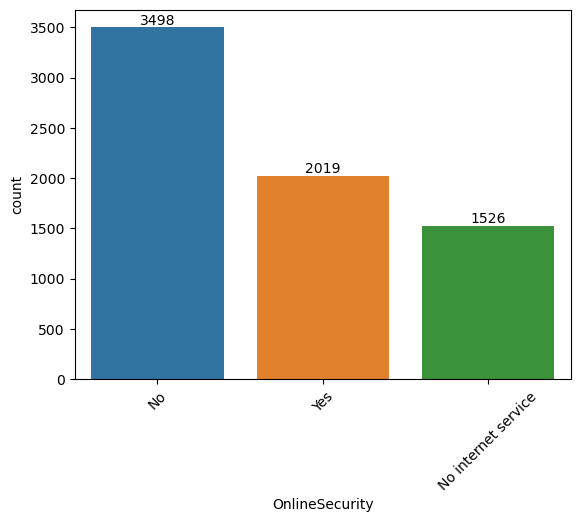

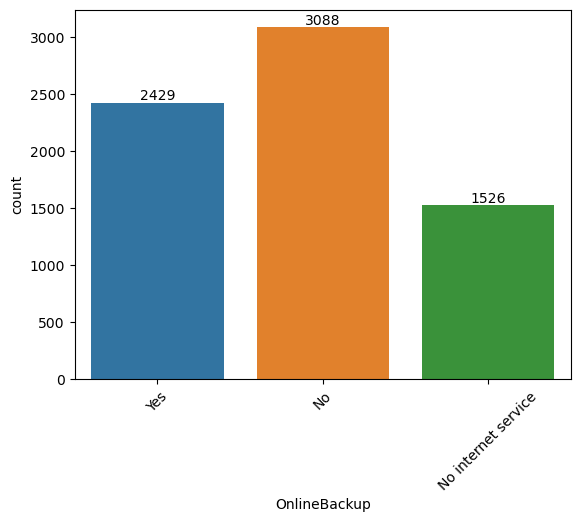

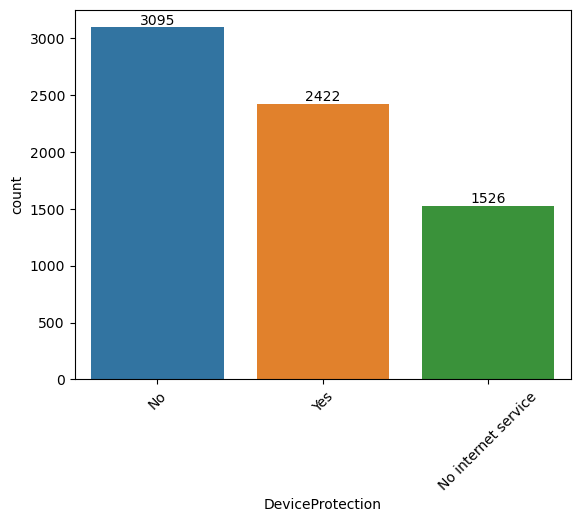

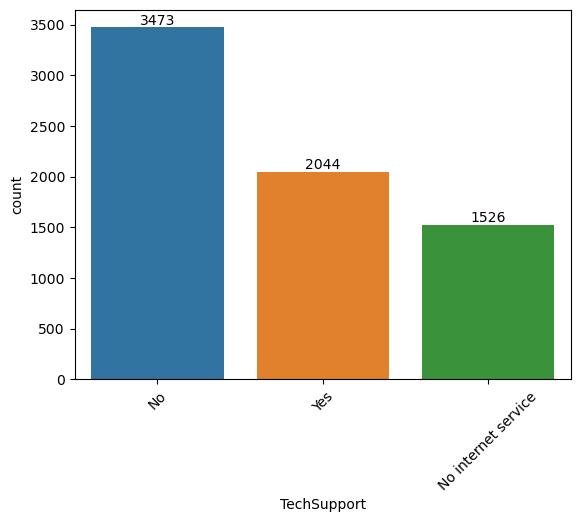

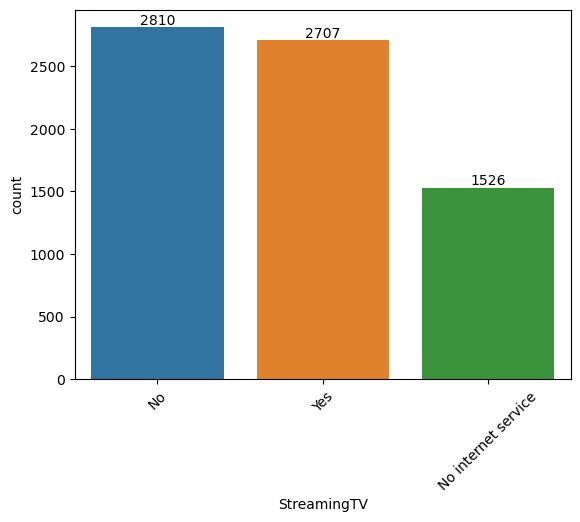

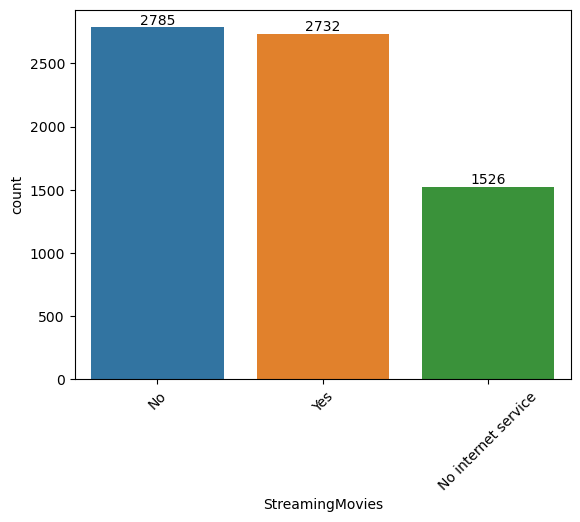

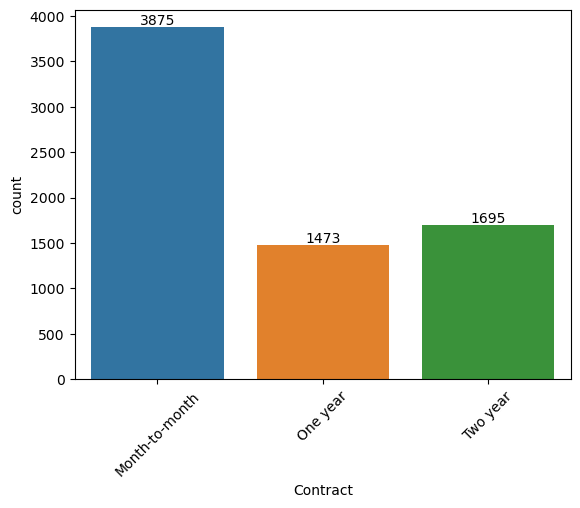

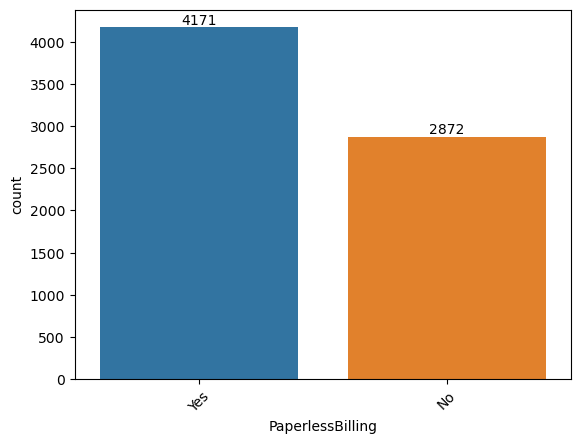

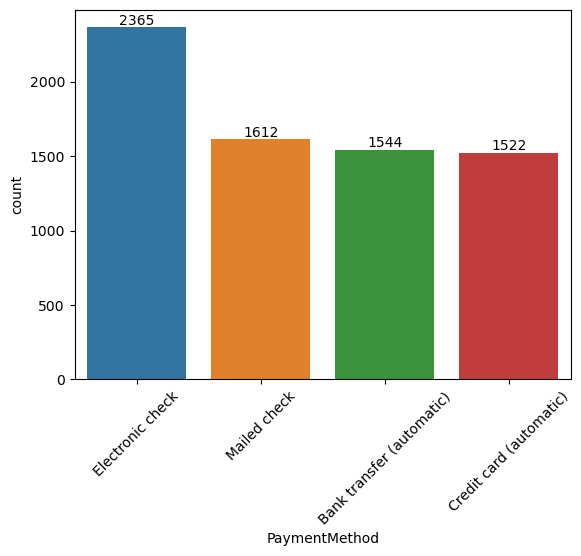

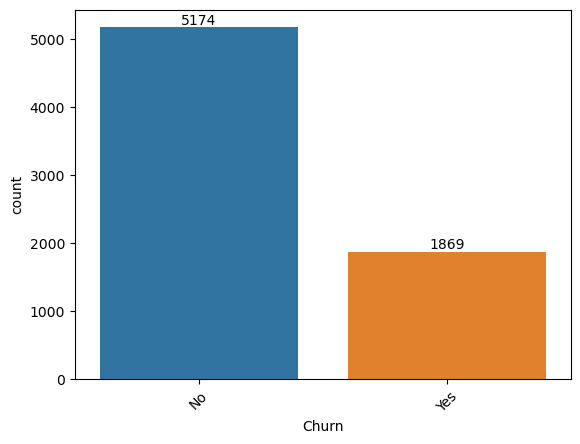

In [23]:
for i in df_categorical:
    b = sns.countplot(df[i])
    b.bar_label(b.containers[0])
    plt.xticks(rotation=45)
    plt.show()

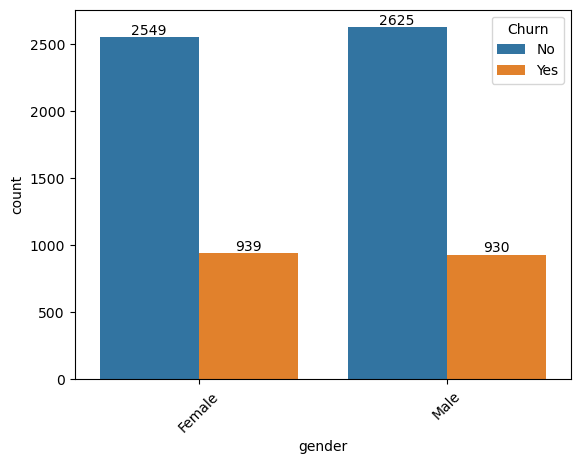

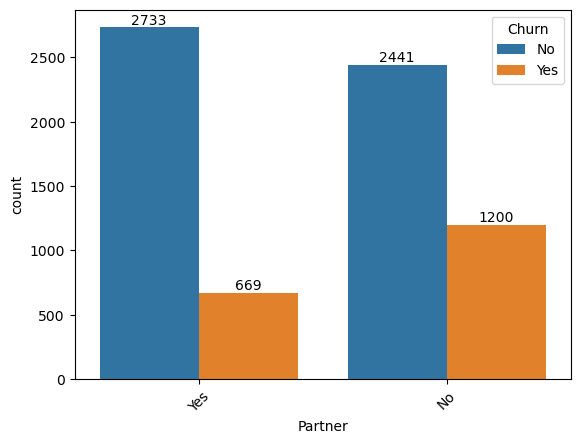

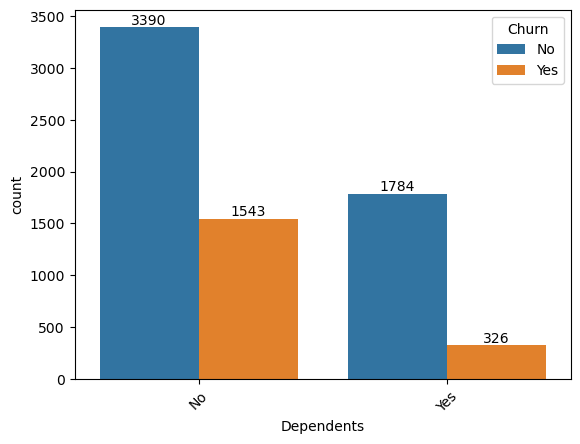

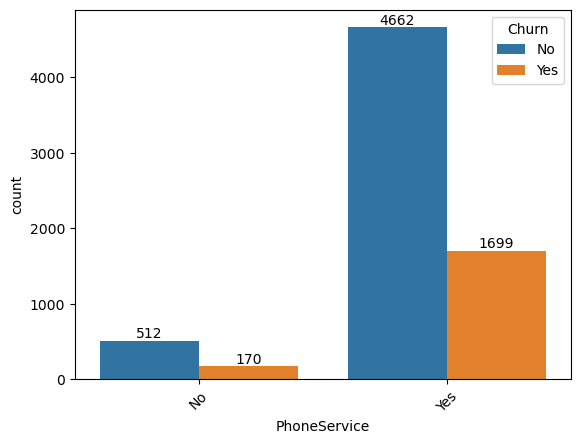

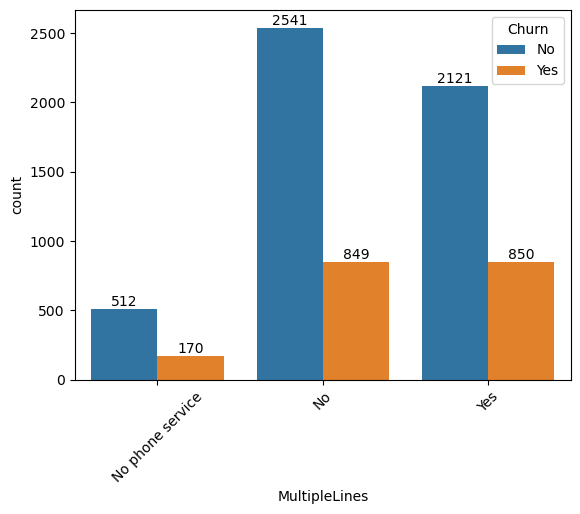

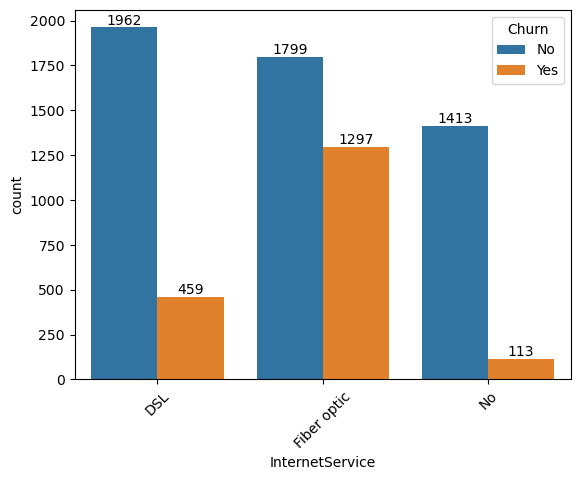

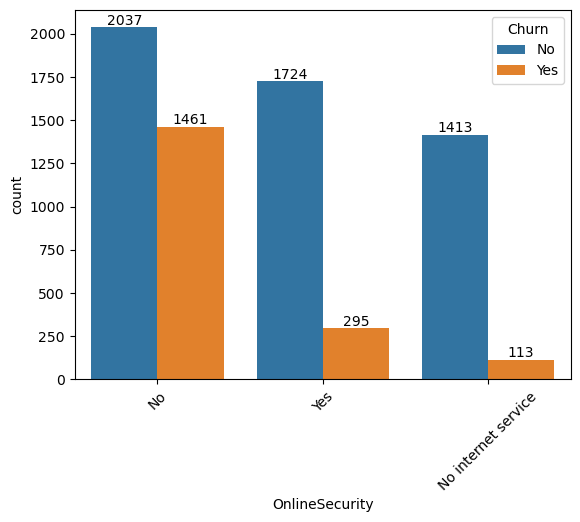

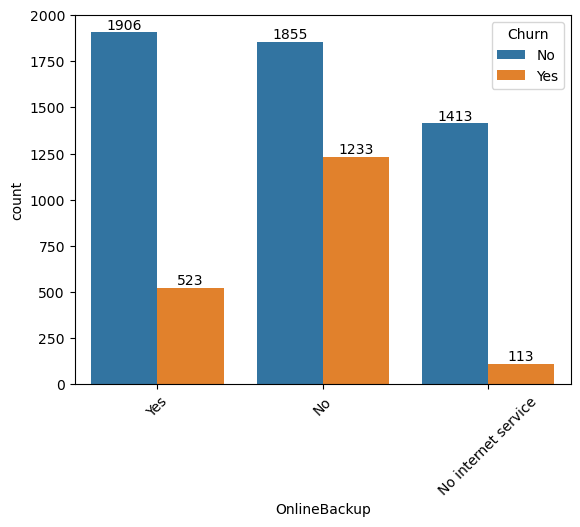

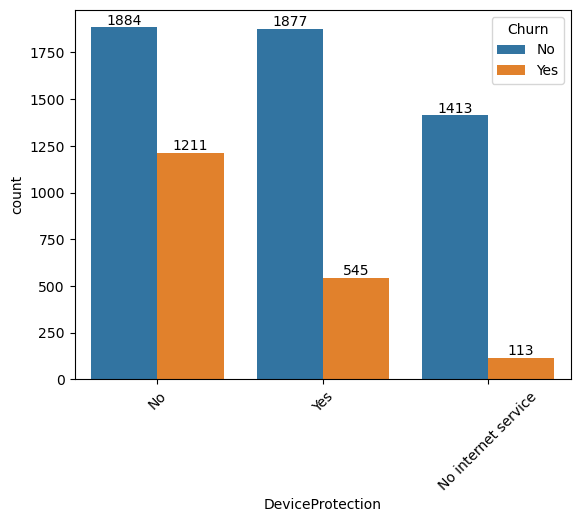

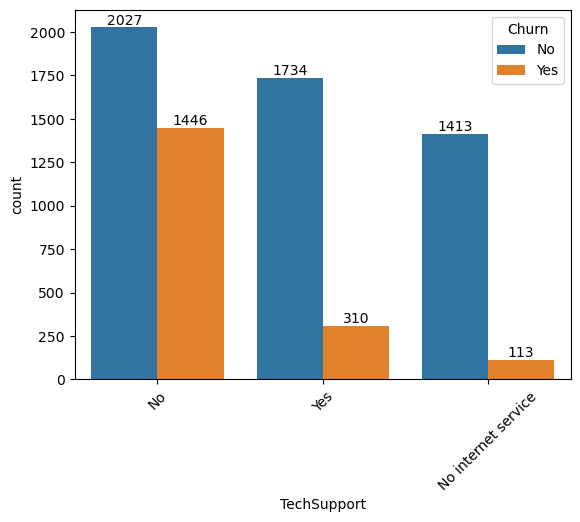

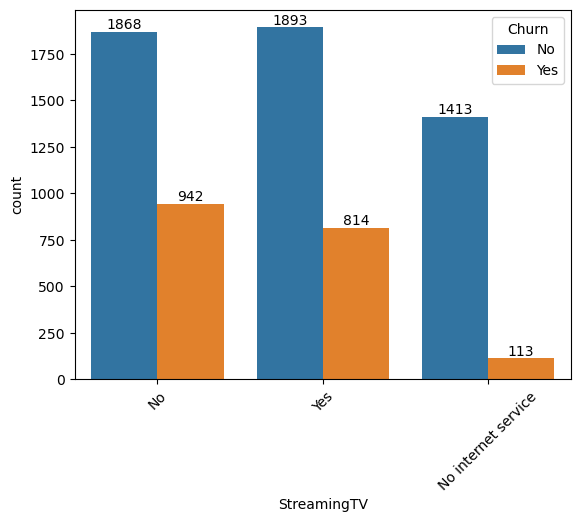

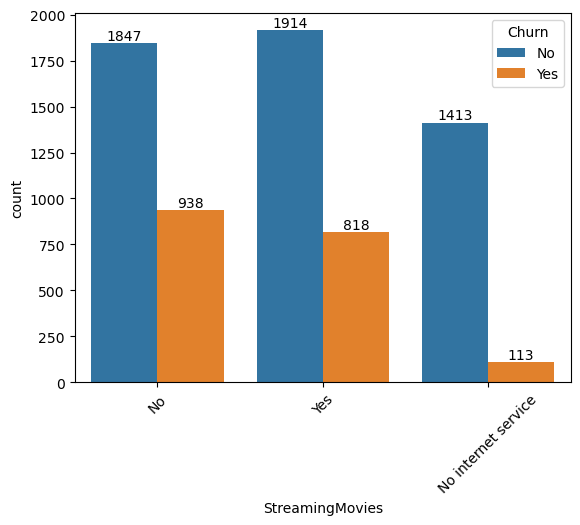

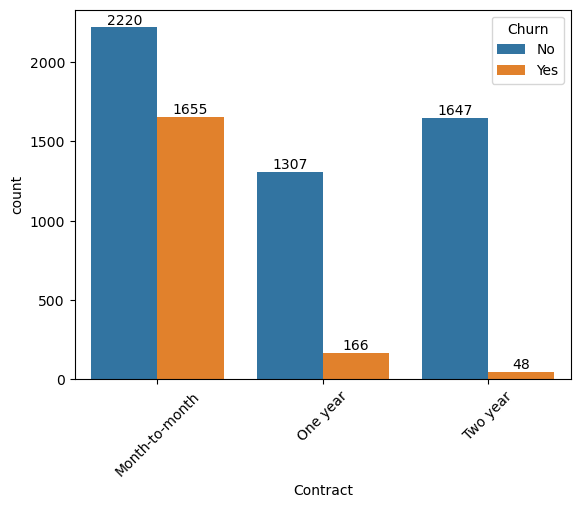

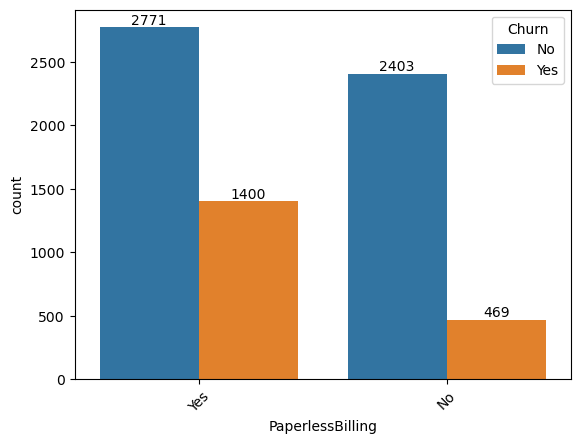

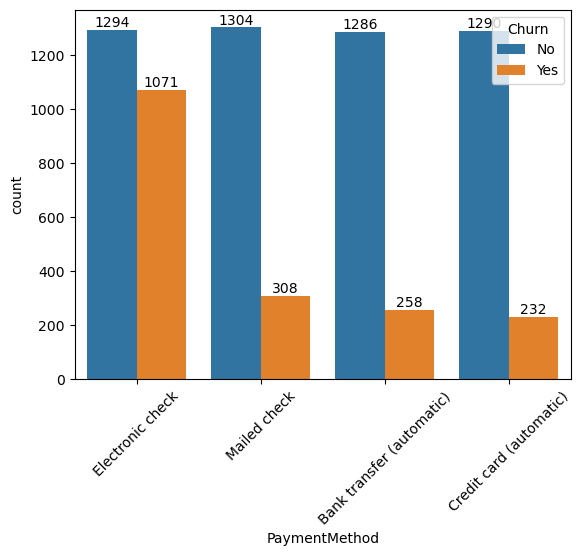

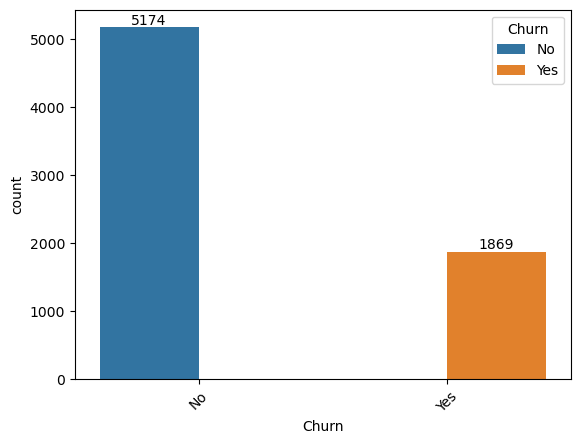

In [24]:
for i in df_categorical:
    b = sns.countplot(df[i], hue = df['Churn'])
    b.bar_label(b.containers[0])
    b.bar_label(b.containers[1])
    plt.xticks(rotation=45)
    plt.show()

### Continuous data

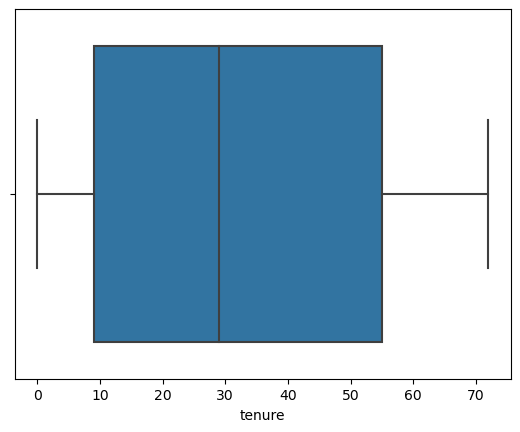

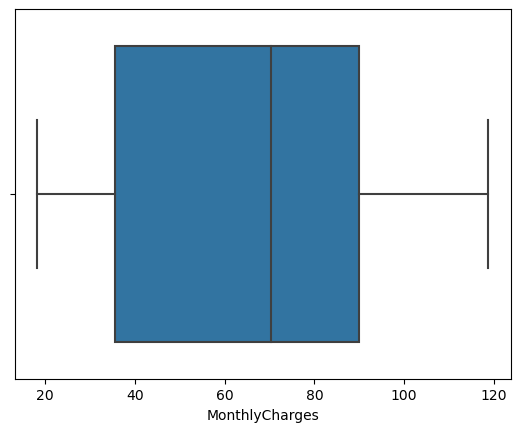

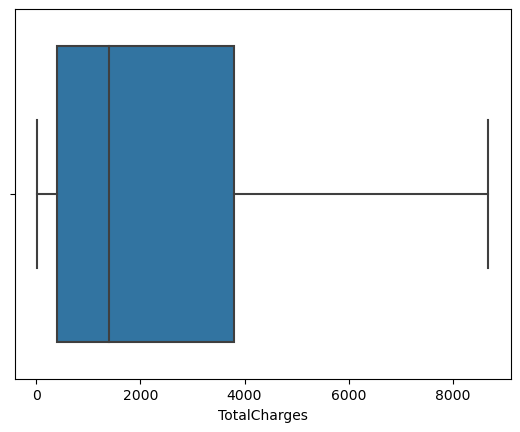

In [25]:
for i in df_continuous:
    sns.boxplot(df[i])
    plt.show()

### From the above boxplots No outliers are found 

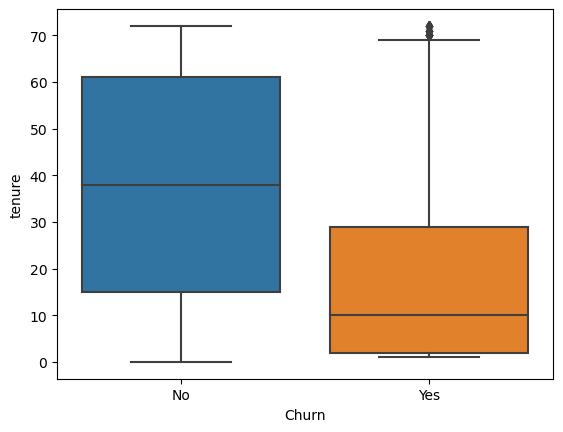

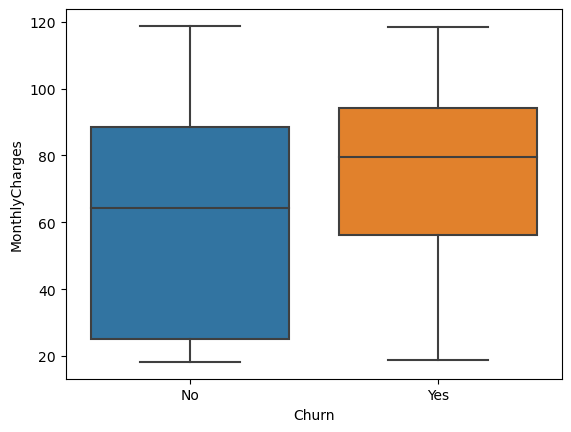

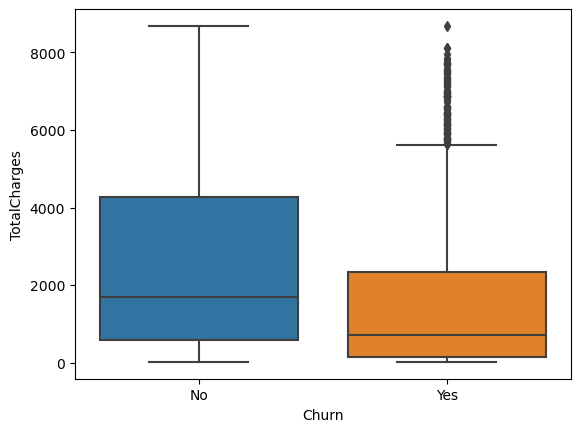

In [26]:
for i in df_continuous:
    sns.boxplot(x=df['Churn'], y=df[i])
    plt.show()

## histogram

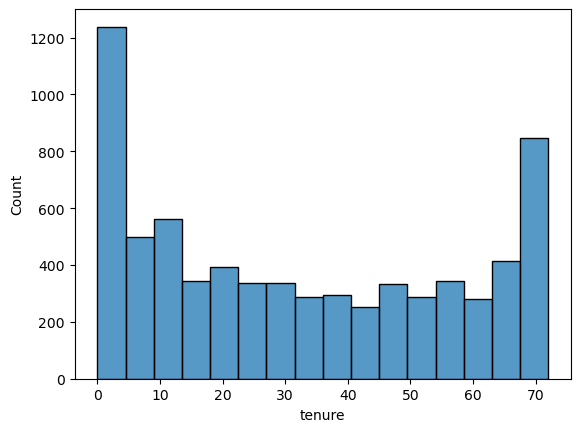

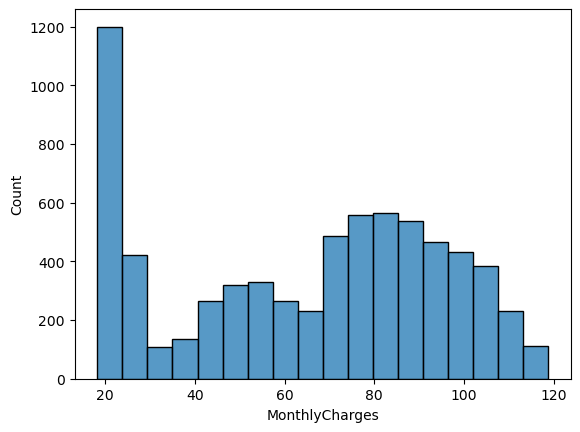

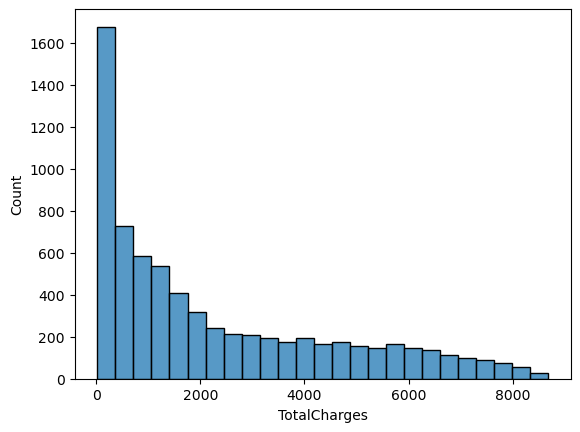

In [27]:
for i in df_continuous:
    sns.histplot(df_continuous[i])
    plt.show()

### pairsplot

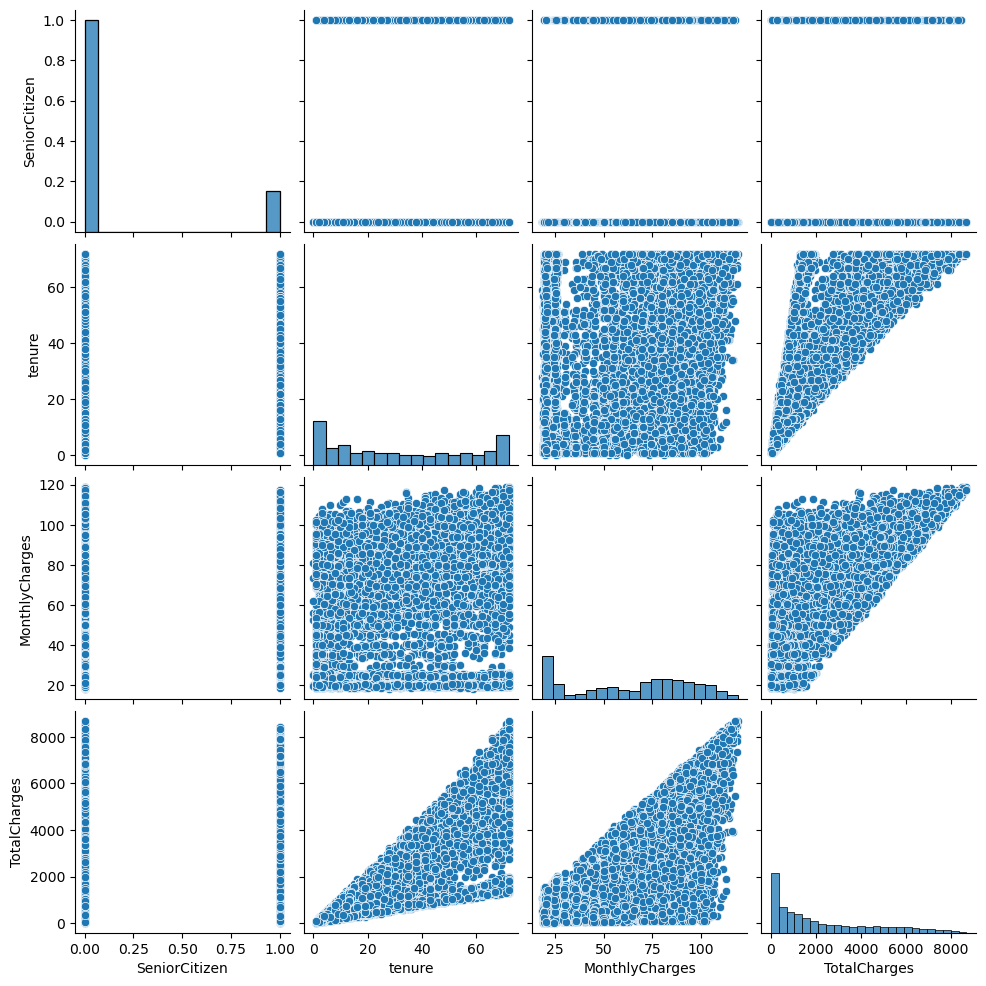

In [28]:
sns.pairplot(df)

### corelation plot

<AxesSubplot:>

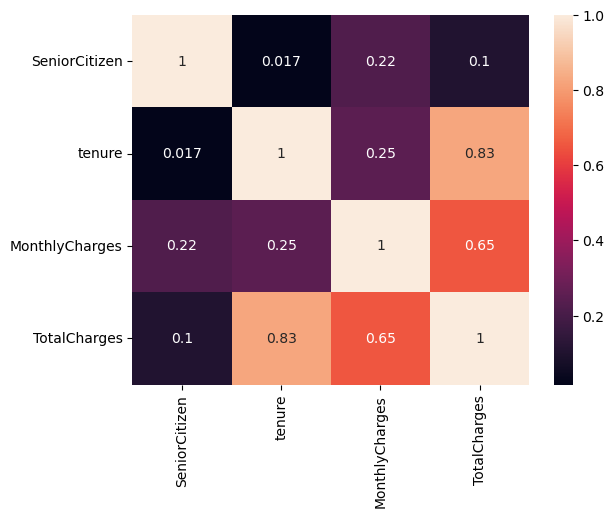

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### From the above info we can see that there are many categorical columns and we shall to convert the categorical columns into numeric columns in order to build the algorithms.

### converting binary variable - Yes and No to 1 and 0

In [31]:
var = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

# mapping function
def mapping(n):
    return n.map({'Yes':1,'No':0})

df[var] = df[var].apply(mapping)
    

### Label encoding for gender column

In [32]:
# import label encoder
from sklearn import preprocessing

In [33]:
# object creation - label_encoder
label_encoder = preprocessing.LabelEncoder()

In [34]:
# encode labels in gender column
df['gender'] = label_encoder.fit_transform(df['gender'])

In [35]:
# to check the unique values in gender column
df['gender'].unique()

array([0, 1])

### For cagetorical columns with multiple levels - create dummies

In [36]:
## create dummy variables

dummy = pd.get_dummies(df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                           'StreamingTV','StreamingMovies','Contract','PaymentMethod',]], drop_first=True)

### concat with the original dataframe

In [37]:
df = pd.concat([df,dummy],axis =1)

In [38]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


### Dropping the repeated variables 

In [39]:
df = df.drop(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                           'StreamingTV','StreamingMovies','Contract','PaymentMethod'],1)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### checking for missing values

In [41]:
df.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

##### It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [42]:
# Removing NaN TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

##### again check for missing values

In [43]:
df.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

##### Now we dont have missing values

## Splitting the data into training and testing set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Putting feature variable to X
X = df.drop(['Churn'], axis=1)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
# response variable to y
y = df['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=300)

### Feature scaling and Data Transformation

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3623,1,1,1,0,0.507042,1,1,0.537313,0.295021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1814,1,0,1,1,0.154930,1,0,0.014428,0.027643,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
4044,0,0,1,0,0.971831,1,1,0.662189,0.680677,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
6930,0,0,1,0,0.028169,1,1,0.566169,0.022842,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6604,1,0,1,1,0.014085,1,1,0.261194,0.008222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3440,0,0,1,1,71,1,1,90.55,6239.05,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
1546,0,0,0,0,60,1,0,19.85,1128.10,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
6905,1,0,0,1,30,0,1,44.50,1307.80,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1926,1,0,1,1,49,1,1,99.80,4872.45,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2633,0,0,1,0,65,1,1,100.15,6643.50,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0


### Transforming to test data

In [51]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3440,0,0,1,1,0.985915,1,1,0.719403,0.717776,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
1546,0,0,0,0,0.830986,1,0,0.015920,0.128006,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
6905,1,0,0,1,0.408451,0,1,0.261194,0.148742,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1926,1,0,1,1,0.676056,1,1,0.811443,0.560080,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2633,0,0,1,0,0.901408,1,1,0.814925,0.764447,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0


## Now the Data is ready for Model Building

### PaymentMethod 

In [ ]:
a = sns.countplot(df['PaymentMethod'])
a.bar_label(a.containers[0])
plt.xticks(rotation=45)
plt.title("Bar Plot of PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

From the above bar plot, the count of electronic check is higher than other Payment methods

In [ ]:
a = sns.countplot(df['PaymentMethod'],hue = df['Churn'])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.xticks(rotation=45)
plt.title("Bar Plot of PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

## MonthlyCharges 

In [ ]:
sns.boxplot(df['MonthlyCharges'])
plt.title("BoxPlot of Monthly Charges")

#### Histogram of Monthly Charges

In [ ]:
sns.histplot(df['MonthlyCharges'])
plt.title("Histogram of Monthly Charges")

In [ ]:
sns.boxplot(x = df['Churn'], y = df['MonthlyCharges'])

## TotalCharges

##### The datatype of TotalCharges is object, we shall convert this into int

In [ ]:
#The varaible was imported as a string we need to convert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.info()

In [ ]:
sns.boxplot(df['TotalCharges'])
plt.title("BoxPlot of Total Charges")

In [ ]:
sns.histplot(df['TotalCharges'])
plt.title("Histogram of Total Charges")

##### The total charges in the dataset is positively skewed

In [ ]:
sns.boxplot(x = df['Churn'], y = df['TotalCharges'])